# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (you could download the notebook with File -> Download .ipynb, open the notebook locally, and then File -> Download as -> PDF via LaTeX), and then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [3]:
import tensorflow as tf
from scipy.io import loadmat
import numpy as np

For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`. You should store these files in Drive for use in this Colab notebook.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [4]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
! ls

gdrive	sample_data


In [6]:
# Load the dataset from your Drive folder

train = loadmat('gdrive/MyDrive/Colab Notebooks/TensorFlow2_1/train_32x32.mat')
test = loadmat('gdrive/MyDrive/Colab Notebooks/TensorFlow2_1/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [7]:
# Extract the training and testing images and labels separately 
# from the train and test dictionaries loaded for you.

train_data = train[ 'X' ]
train_targets = train[ 'y' ]
test_data = test[ 'X' ]
test_targets = test[ 'y' ]

# Transposing data so that the first dimension of the tensor is the batch size
train_data = np.transpose( train_data , ( 3, 0, 1, 2 ) )
test_data = np.transpose( test_data , ( 3, 0, 1, 2 ) )

# Preprocessing target labels so that label 10 is converted to label 0
train_targets = train_targets % 10
test_targets = test_targets % 10
np.unique( test_targets )


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

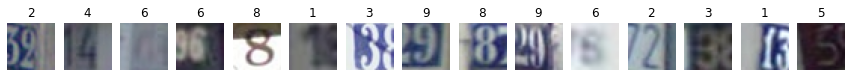

In [8]:
# Select a random sample of images and corresponding labels 
# from the dataset (at least 10), and display them in a figure.

import matplotlib.pyplot as plt

nims = 15 # 15 images to be presented
rvals = np.random.randint( 0 , train_targets.shape[ 0 ] , nims )

fig, ax = plt.subplots( 1 , nims , figsize=( 15 , 1 ) )
for i in range( len( rvals ) ):
    ax[ i ].set_axis_off()
    ax[ i ].imshow( train_data[ rvals[ i ] ] )
    ax[ i ].set_title( train_targets[ rvals[ i ] ][0] )
    

In [9]:
# Convert the training and test images to grayscale by taking the average across 
# all colour channels for each pixel. Hint: retain the channel dimension, which 
# will now have size 1.

train_data = train_data.mean( axis=3 , keepdims=True )
test_data = test_data.mean( axis=3 , keepdims=True )

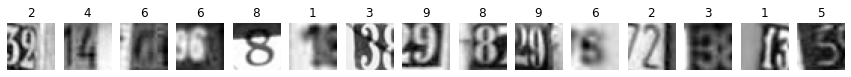

In [10]:
# Select a random sample of the grayscale images and corresponding labels 
# from the dataset (at least 10), and display them in a figure.

# I have chosen to show the same randomly selected images as before, for 
# easier comparison of the effect of 'grayscaling'

fig, ax = plt.subplots( 1 , nims , figsize=( 15 , 1 ) )
for i in range( len( rvals ) ):
    ax[ i ].set_axis_off()
    ax[ i ].imshow( train_data.squeeze()[ rvals[ i ] ] , cmap='gray')
    ax[ i ].set_title( train_targets[ rvals[ i ] ][0] )

In [11]:
train_data.shape

(73257, 32, 32, 1)

In [20]:
! pwd

/content


## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [21]:
# Build an MLP classifier model using the Sequential API. Your model should 
# use only Flatten and Dense layers, with the final layer having a 10-way 
# softmax output.
#
# You should design and build the model yourself. Feel free to experiment with 
# different MLP architectures. Hint: to achieve a reasonable accuracy you won't 
# need to use more than 4 or 5 layers.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def get_MLP_model():
    
    model = Sequential([ Flatten( input_shape=( 32 , 32 , 1 ) , name='flatten') ,
                    Dense( 512 , activation='relu' , name='dense_2') ,
                    Dense( 512 , activation='relu' , name='dense_3') ,
                    Dense( 256 , activation='relu' , name='dense_4') ,
                    Dense( 10 , activation='softmax' , name='dense_5')  
                       ])

    model.compile( optimizer=tf.keras.optimizers.Adam( learning_rate = 0.0001 ) ,
                  loss='sparse_categorical_crossentropy' ,
                  metrics=[ 'accuracy' , 'mae' ] )
    
    return model

MLP_model = get_MLP_model()

In [22]:
# Print out the model summary (using the summary() method)
MLP_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 921,354
Trainable params: 921,354
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile and train the model (we recommend a maximum of 30 epochs), 
# making use of both training and validation sets during the training run.
#
# Your model should track at least one appropriate metric, and use at 
# least two callbacks during training, one of which should be a ModelCheckpoint callback.
#
# As a guide, you should aim to achieve a final categorical cross entropy 
# training loss of less than 1.0 (the validation loss might be higher).


from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

checkpoint = ModelCheckpoint( 
    filepath='gdrive/MyDrive/Colab Notebooks/TensorFlow2_1/checkpoints_best_only/checkpoint' ,
                             frequency='epoch' ,
                             save_weights_only=True ,
                             save_best_only=True ,
                             monitor='val_accuracy' ,
                             verbose=1 )

lr_reduction = ReduceLROnPlateau( factor=0.2 , 
                                 patience=20 )
                             
                             
history = MLP_model.fit( train_data ,
                    train_targets ,
                    epochs=15 ,
                    validation_split=0.15 ,
                    batch_size=20 ,
                    verbose=1 ,
                    callbacks=[ checkpoint , lr_reduction ] )


         

Epoch 1/15
3109/3114 [============================>.] - ETA: 0s - loss: 4.7612 - accuracy: 0.3355 - mae: 3.7414
Epoch 1: val_accuracy improved from -inf to 0.43835, saving model to gdrive/MyDrive/Colab Notebooks/TensorFlow2_1/checkpoints_best_only/checkpoint
3114/3114 [==============================] - 38s 12ms/step - loss: 4.7575 - accuracy: 0.3357 - mae: 3.7415 - val_loss: 2.0752 - val_accuracy: 0.4383 - val_mae: 3.7558 - lr: 1.0000e-04
Epoch 2/15
3112/3114 [============================>.] - ETA: 0s - loss: 1.6228 - accuracy: 0.5226 - mae: 3.7415
Epoch 2: val_accuracy improved from 0.43835 to 0.57867, saving model to gdrive/MyDrive/Colab Notebooks/TensorFlow2_1/checkpoints_best_only/checkpoint
3114/3114 [==============================] - 40s 13ms/step - loss: 1.6228 - accuracy: 0.5227 - mae: 3.7415 - val_loss: 1.3753 - val_accuracy: 0.5787 - val_mae: 3.7558 - lr: 1.0000e-04
Epoch 3/15
3111/3114 [============================>.] - ETA: 0s - loss: 1.2880 - accuracy: 0.6054 - mae: 3.7411

In [24]:
! ls gdrive/MyDrive/Colab\ Notebooks/TensorFlow2_1/checkpoints_best_only -l

total 10804
-rw------- 1 root root       77 Aug 11 14:28 checkpoint
-rw------- 1 root root 11060112 Aug 11 14:28 checkpoint.data-00000-of-00001
-rw------- 1 root root     2065 Aug 11 14:28 checkpoint.index


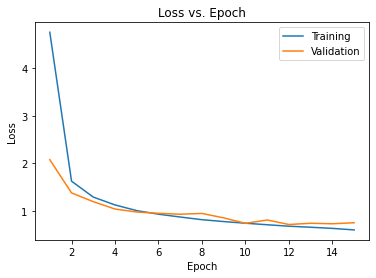

In [27]:
# Plot the learning curves for loss vs epoch and accuracy vs epoch 
# for both training and validation sets.

# Plot Loss vs Epoch for the MLP model
plt.plot( np.arange( 1 , 16 ) , history.history[ 'loss' ] )
plt.plot( np.arange( 1 , 16 ) , history.history[ 'val_loss' ] )
plt.title( 'Loss vs. Epoch' )
plt.xlabel( 'Epoch' )
plt.ylabel( 'Loss' )
plt.legend( ['Training', 'Validation'] , loc='upper right' )
plt.show()



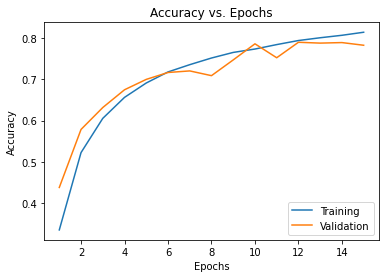

In [28]:
# Plot Accuracy vs Epoch for the MLP model
plt.plot( np.arange( 1 , 16 ) , history.history[ 'accuracy' ] )
plt.plot( np.arange( 1 , 16 ) , history.history[ 'val_accuracy' ] )
plt.title( 'Accuracy vs. Epochs' )
plt.xlabel( 'Epochs' )
plt.ylabel( 'Accuracy' )
plt.legend( ['Training', 'Validation'] , loc='lower right' )
plt.show()

In [30]:
# Compute and display the loss and accuracy of the trained MLP model on 
# the test set.

l , a, m = MLP_model.evaluate( test_data , test_targets , verbose=0 )
print( f'On the test data, the fitted MLP model has a loss of {l:.4f} ')
print( f'The accuracy is {a:.4f}')
print( f'The mean absolute error is {m:.4f}')

On the test data, the fitted MLP model has a loss of 0.8911 
The accuracy is 0.7614
The mean absolute error is 3.6659


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [35]:
# Build a CNN classifier model using the Sequential API. Your model should 
# use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout 
# layers. The final layer should again have a 10-way softmax output.
#
# You should design and build the model yourself. Feel free to experiment with 
# different CNN architectures. Hint: to achieve a reasonable accuracy you won't 
# need to use more than 2 or 3 convolutional layers and 2 fully connected 
# layers.)

from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout

def get_CNN_model():
    
    model = Sequential([ Conv2D( filters=24 , input_shape=(32, 32, 1) ,
                                kernel_size=(4,4) , activation='relu' , 
                                name='conv_1' ) ,
                        BatchNormalization() ,
                        Conv2D( filters=16 , kernel_size=(4,4) , 
                                activation='relu' , name='conv_2' ) ,
                        MaxPool2D( pool_size=(4,4) ) ,
                        Flatten() ,
                        Dense( 128 , activation='relu' ) ,  
                        Dropout( 0.2 ) ,
                        Dense( 10 , activation='softmax' ) ])
    
    model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001) ,
                  loss='sparse_categorical_crossentropy' ,
                  metrics=[ 'accuracy' , 'mae' ] )
    
    return model

model_CNN = get_CNN_model()



In [36]:
# The CNN model should use fewer trainable parameters than your MLP model.
model_CNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 29, 29, 24)        408       
                                                                 
 batch_normalization_2 (Batc  (None, 29, 29, 24)       96        
 hNormalization)                                                 
                                                                 
 conv_2 (Conv2D)             (None, 26, 26, 16)        6160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 576)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
# Compile and train the model (we recommend a maximum of 30 epochs), making 
# use of both training and validation sets during the training run.
#
# Your model should track at least one appropriate metric, and use at least 
# two callbacks during training, one of which should be a ModelCheckpoint 
# callback.
#
# You should aim to beat the MLP model performance with fewer parameters!

checkpoint = ModelCheckpoint( 
    filepath='gdrive/MyDrive/Colab Notebooks/TensorFlow2_1/CNN_checkpoints_best_only/checkpoint' ,
                             frequency='epoch' ,
                             save_weights_only=True ,
                             save_best_only=True ,
                             monitor='val_accuracy' ,
                             verbose=1 )              
                             
h_CNN = model_CNN.fit( train_data ,
                    train_targets ,
                    epochs=15 ,
                    validation_split=0.15 ,
                    batch_size=20 ,
                    verbose=1 ,
                    callbacks=[ checkpoint  , lr_reduction ] )





In [39]:
! ls gdrive/MyDrive/Colab\ Notebooks/TensorFlow2_1/CNN_checkpoints_best_only -l

total 967
-rw------- 1 root root     77 Aug 11 15:25 checkpoint
-rw------- 1 root root 986414 Aug 11 15:25 checkpoint.data-00000-of-00001
-rw------- 1 root root   2524 Aug 11 15:25 checkpoint.index


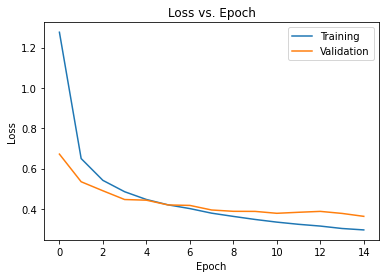

In [40]:
# Plot the learning curves for loss vs epoch and accuracy vs epoch for both 
# training and validation sets.

# Plot Loss vs Epoch for CNN Model
plt.plot( h_CNN.history[ 'loss' ] )
plt.plot( h_CNN.history[ 'val_loss' ] )
plt.title( 'Loss vs. Epoch' )
plt.xlabel( 'Epoch' )
plt.ylabel( 'Loss' )
plt.legend( ['Training', 'Validation'] , loc='upper right' )
plt.show()

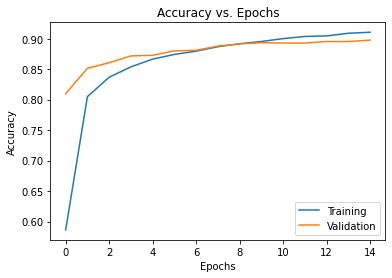

In [41]:
# Plot Accuracy vs Epoch for CNN Model
plt.plot( h_CNN.history[ 'accuracy' ] )
plt.plot( h_CNN.history[ 'val_accuracy' ] )
plt.title( 'Accuracy vs. Epochs' )
plt.xlabel( 'Epochs' )
plt.ylabel( 'Accuracy' )
plt.legend( ['Training', 'Validation'] , loc='lower right' )
plt.show()

In [42]:
# Compute and display the loss and accuracy of the trained CNN model on the 
# test set.

l , a , m = model_CNN.evaluate( test_data , test_targets , verbose=0 )
print( f'On the test data, the model has a loss of {l:.4f} ')
print( f'The accuracy is {a:.4f}')
print( f'The mean absolute error is {m:.4f}')

On the test data, the model has a loss of 0.4077 
The accuracy is 0.8851
The mean absolute error is 3.6659


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [44]:
# Load the best weights for the MLP and CNN models that you saved during 
# the training run.

# Load best MLP weights to new model
best_MLP_model = get_MLP_model()
best_MLP_model.load_weights( 'gdrive/MyDrive/Colab Notebooks/TensorFlow2_1/checkpoints_best_only/checkpoint' )
print( 'Check evaluation of best multilayer perceptron (MLP) model:' )
print( best_MLP_model.evaluate( test_data , test_targets , verbose=0 ) )

# Load best CNN weights to new model
best_CNN_model = get_CNN_model()
best_CNN_model.load_weights( 'gdrive/MyDrive/Colab Notebooks/TensorFlow2_1/CNN_checkpoints_best_only/checkpoint' )
print( 'Check evaluation of best convolutional neural network (CNN) model:' )
print( best_CNN_model.evaluate( test_data , test_targets , verbose=0 ) )

Check evaluation of best multilayer perceptron (MLP) model:
[0.856986403465271, 0.7635602355003357, 3.665895938873291]
Check evaluation of best convolutional neural network (CNN) model:
[0.4011072814464569, 0.8875998854637146, 3.665895938873291]


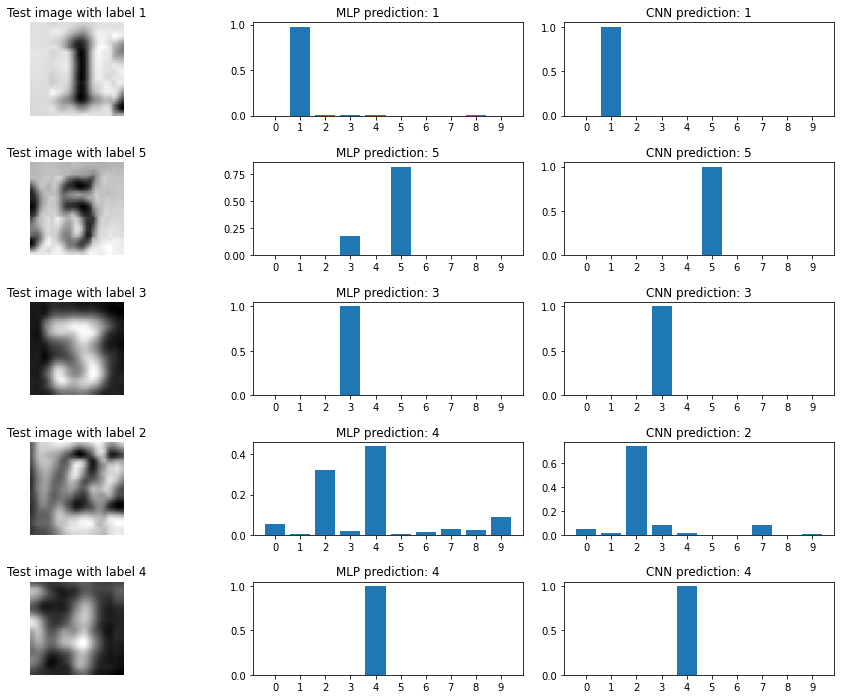

In [47]:
# Randomly select 5 images and corresponding labels from the test set and 
# display the images with their labels.
#
# Alongside the image and label, show each model’s predictive distribution as 
# a bar chart, and the final model prediction given by the label with maximum 
# probability.
digits = [ str(x) for x in range( 10 ) ]

fig , ax = plt.subplots( 5 , 3 , figsize=(16,12) )
fig.subplots_adjust( hspace=0.5 , wspace=0.15 )

for i in range( 5 ):
  r = np.random.randint( 0 , test_targets.shape[ 0 ] )
  test_image = test_data[ r ]
  p1 = best_MLP_model.predict( test_image[ np.newaxis , ... ] )
  p2 = best_CNN_model.predict( test_image[ np.newaxis , ...  ] )

  # Plot test image
  ax[ i , 0 ].set_axis_off()
  ax[ i , 0 ].imshow( test_data.squeeze()[ r ] , cmap='gray' )
  ax[ i , 0 ].set_title( 'Test image with label ' + str( test_targets[ r ][ 0 ] ) )

  # Plot histogram of MLP model predictions  
  ax[ i , 1 ].bar( digits , p1[0] )
  ax[ i , 1 ].set_title( 'MLP prediction: ' + str( np.argmax( p1 ) ) )

  # Plot histogram of CNN model predictions
  ax[ i , 2 ].bar( digits , p2[0] )
  ax[ i , 2 ].set_title( 'CNN prediction: ' + str( np.argmax( p2 ) ) )

  # Set spacing
  #fig.tight_layout()
  #plt.show()



